In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [2]:
# Configure environment settings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 200

In [3]:
train_data = pd.read_csv('Titanic_train.csv')
test_data = pd.read_csv('Titanic_test.csv')

In [4]:
test_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [5]:
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [6]:
# Concatenate the training and testing datasets
df = pd.concat([train_data,test_data],axis = 0,ignore_index=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


In [8]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
df.dtypes

PassengerId      int64
Survived       float64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [10]:
# Display basic info about the data
df.describe(include= 'all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,1309.000000,891.000000,1309.000000,1309,1309,1046.000000,1309.000000,1309.000000,1309,1308.000000,295,1307
unique,NaN,NaN,NaN,1307,2,NaN,NaN,NaN,929,NaN,186,3
top,NaN,NaN,NaN,"Connolly, Miss. Kate",male,NaN,NaN,NaN,CA. 2343,NaN,C23 C25 C27,S
freq,NaN,NaN,NaN,2,843,NaN,NaN,NaN,11,NaN,6,914
mean,655.000000,0.383838,2.294882,NaN,NaN,29.881138,0.498854,0.385027,NaN,33.295479,NaN,NaN
std,378.020061,0.486592,0.837836,NaN,NaN,14.413493,1.041658,0.865560,NaN,51.758668,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.170000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,328.000000,0.000000,2.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN
50%,655.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,982.000000,1.000000,3.000000,NaN,NaN,39.000000,1.000000,0.000000,NaN,31.275000,NaN,NaN


In [11]:
# Drop unnecessary columns and handle missing values
df.drop(columns = ['PassengerId','Name','Ticket','Embarked','Fare','Parch','SibSp'],inplace=True)

In [13]:
df.isnull().sum()

Survived     418
Pclass         0
Sex            0
Age          263
Cabin       1014
dtype: int64

In [15]:
df['Age'].fillna(df['Age'].median(),inplace = True)

In [16]:
df.drop(columns='Cabin',inplace= True)

In [17]:
df = pd.get_dummies(df,columns = ['Sex'],dtype=int)

In [18]:
df

,Survived,Pclass,Age,Sex_female,Sex_male
0,0.0,3,22.0,0,1
1,1.0,1,38.0,1,0
2,1.0,3,26.0,1,0
3,1.0,1,35.0,1,0
4,0.0,3,35.0,0,1
...,...,...,...,...,...
1304,NaN,3,28.0,0,1
1305,NaN,1,39.0,1,0
1306,NaN,3,38.5,0,1
1307,NaN,3,28.0,0,1


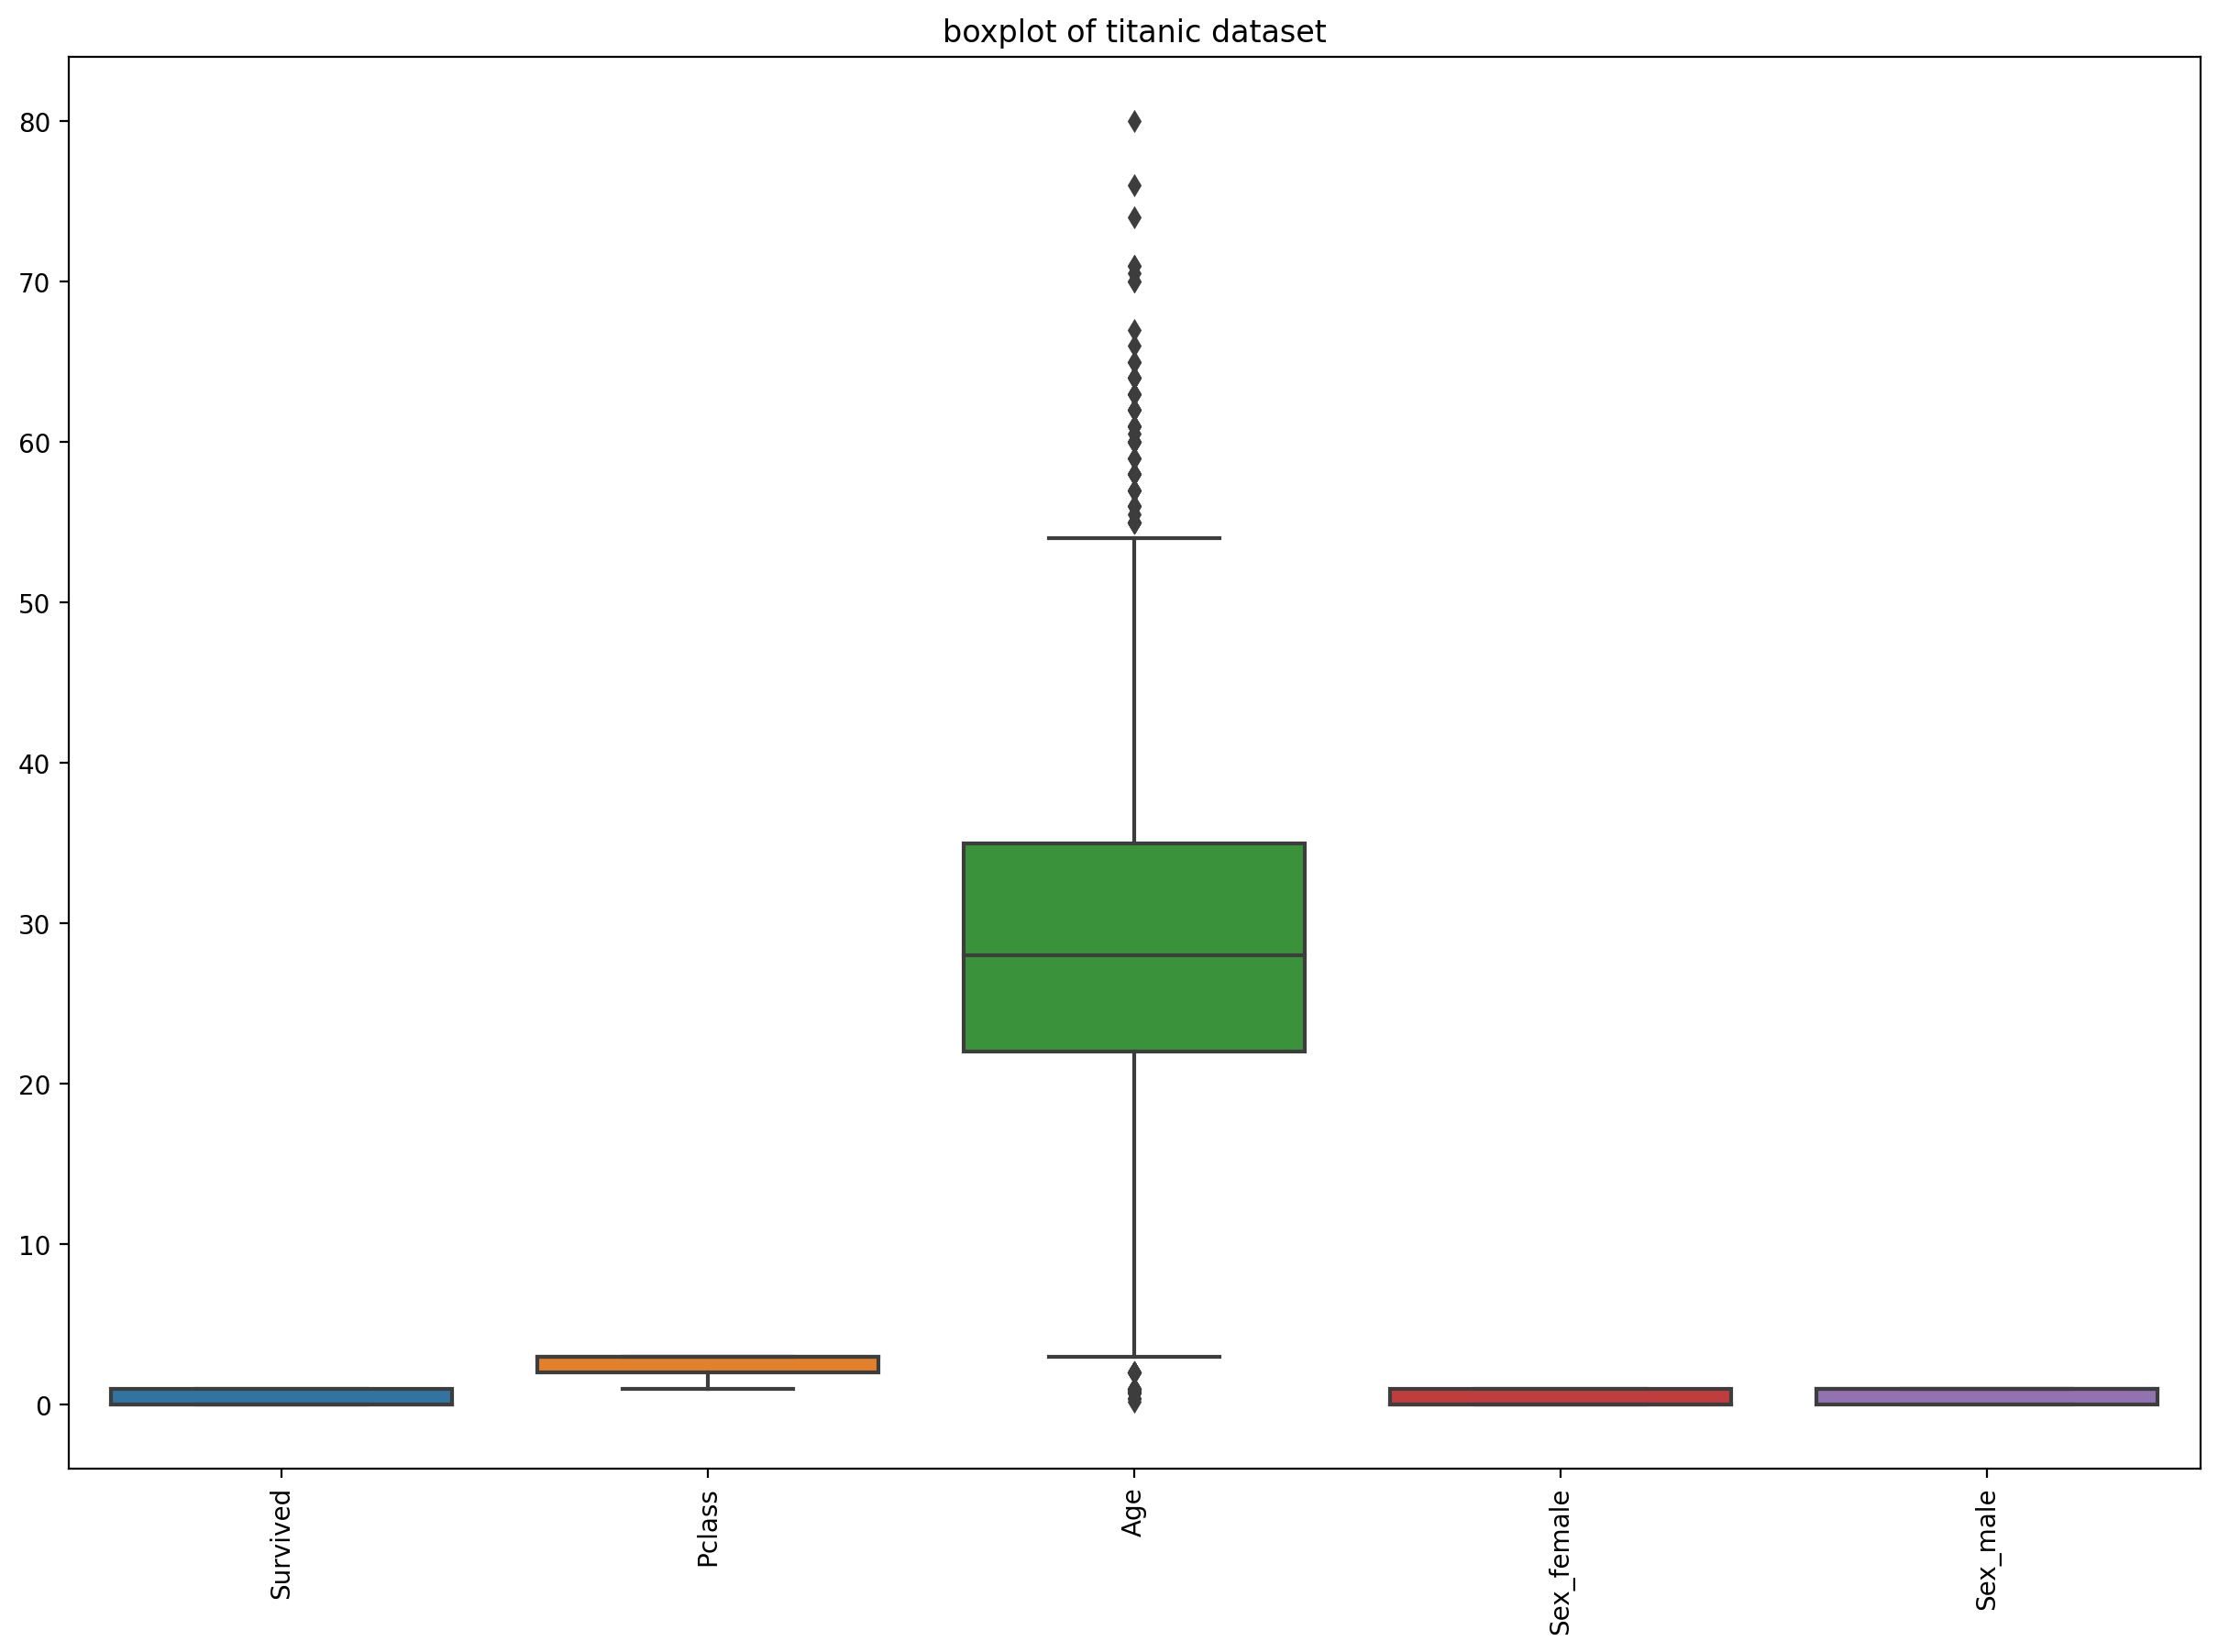

In [19]:
# Visualize outliers using boxplots
plt.figure(figsize=(15,10))
sns.boxplot(data = df)
plt.xticks(rotation = 90)
plt.title('boxplot of titanic dataset')
plt.show()

In [31]:
# Outlier detection and handling
def handle_outliers(data,columns):
    for column in columns:
        q3 = data[column].quantile(0.75)
        q1 = data[column].quantile(0.25)
        iqr = q3 - q1
        lower_bound = q1 - (1.5 * iqr)
        upper_bound = q3 + (1.5 * iqr)
        data[column] = np.where(data[column] > upper_bound, upper_bound, np.where(data[column] < lower_bound,lower_bound,data[column]))
    
handle_outliers(df,df.columns)

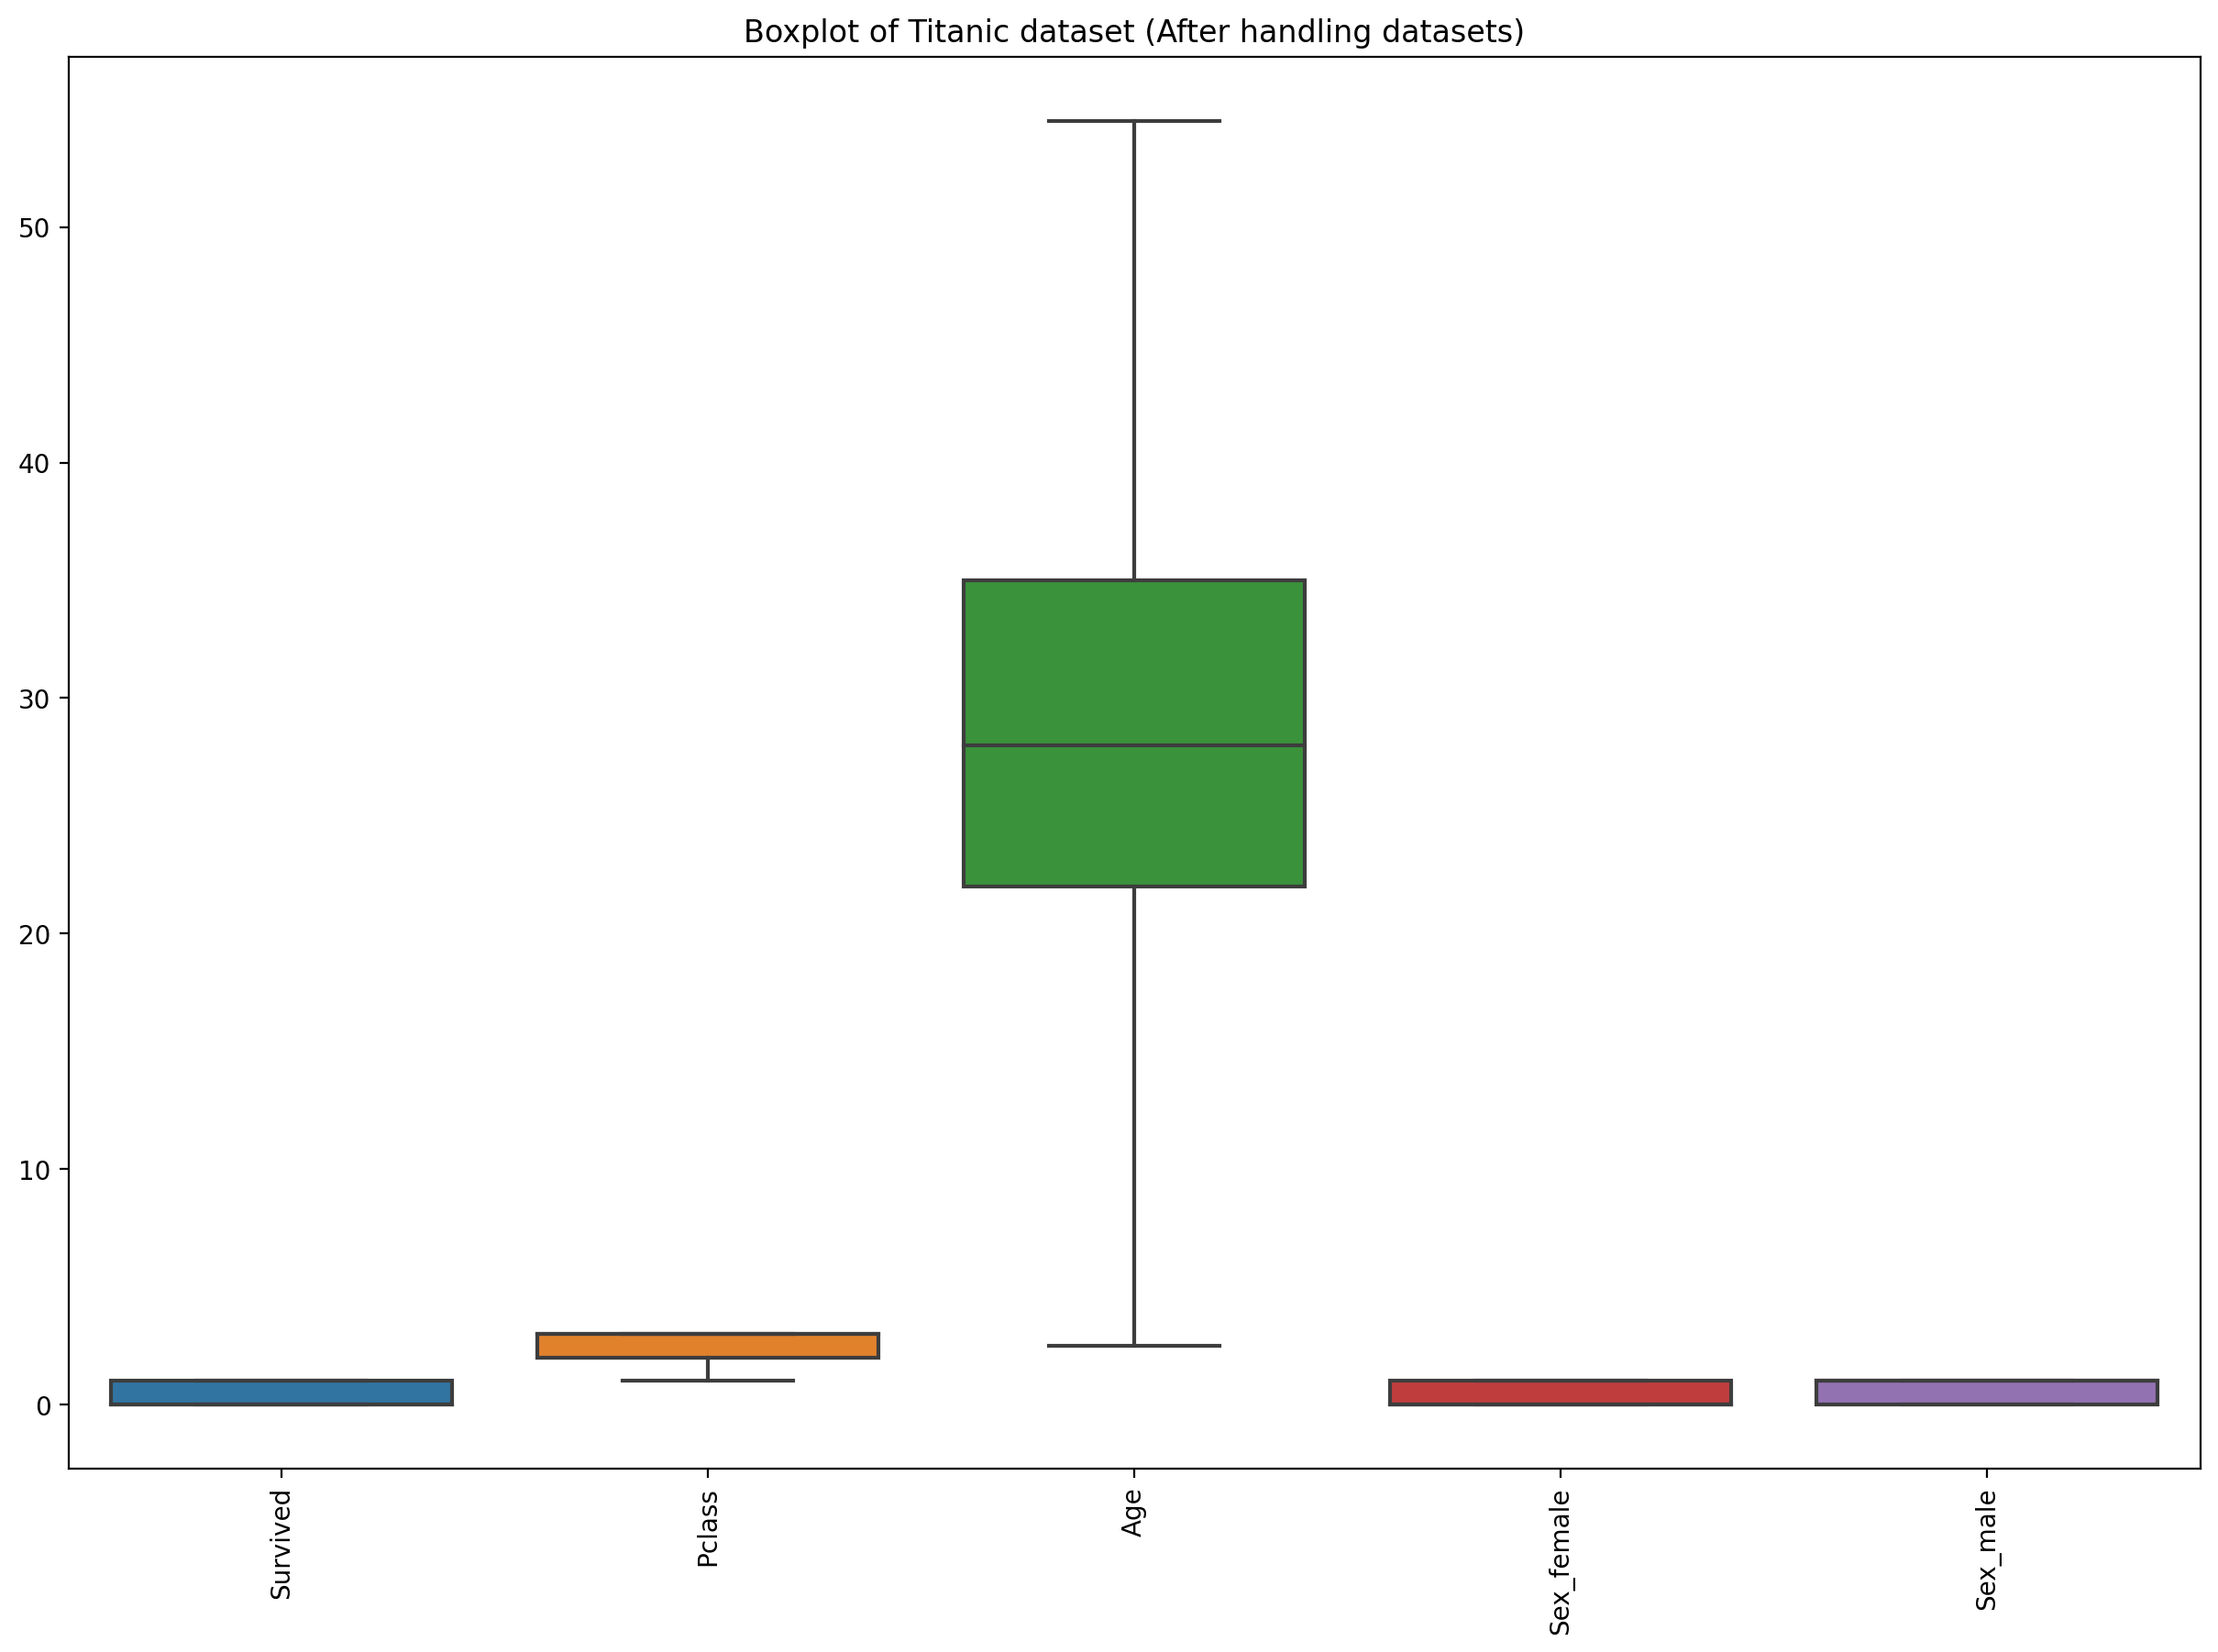

In [63]:
# Visualize outliers after handling
plt.figure(figsize=(15,10))
sns.boxplot(df)
plt.xticks(rotation = 90)
plt.title('Boxplot of Titanic dataset (After handling datasets)')
plt.show()

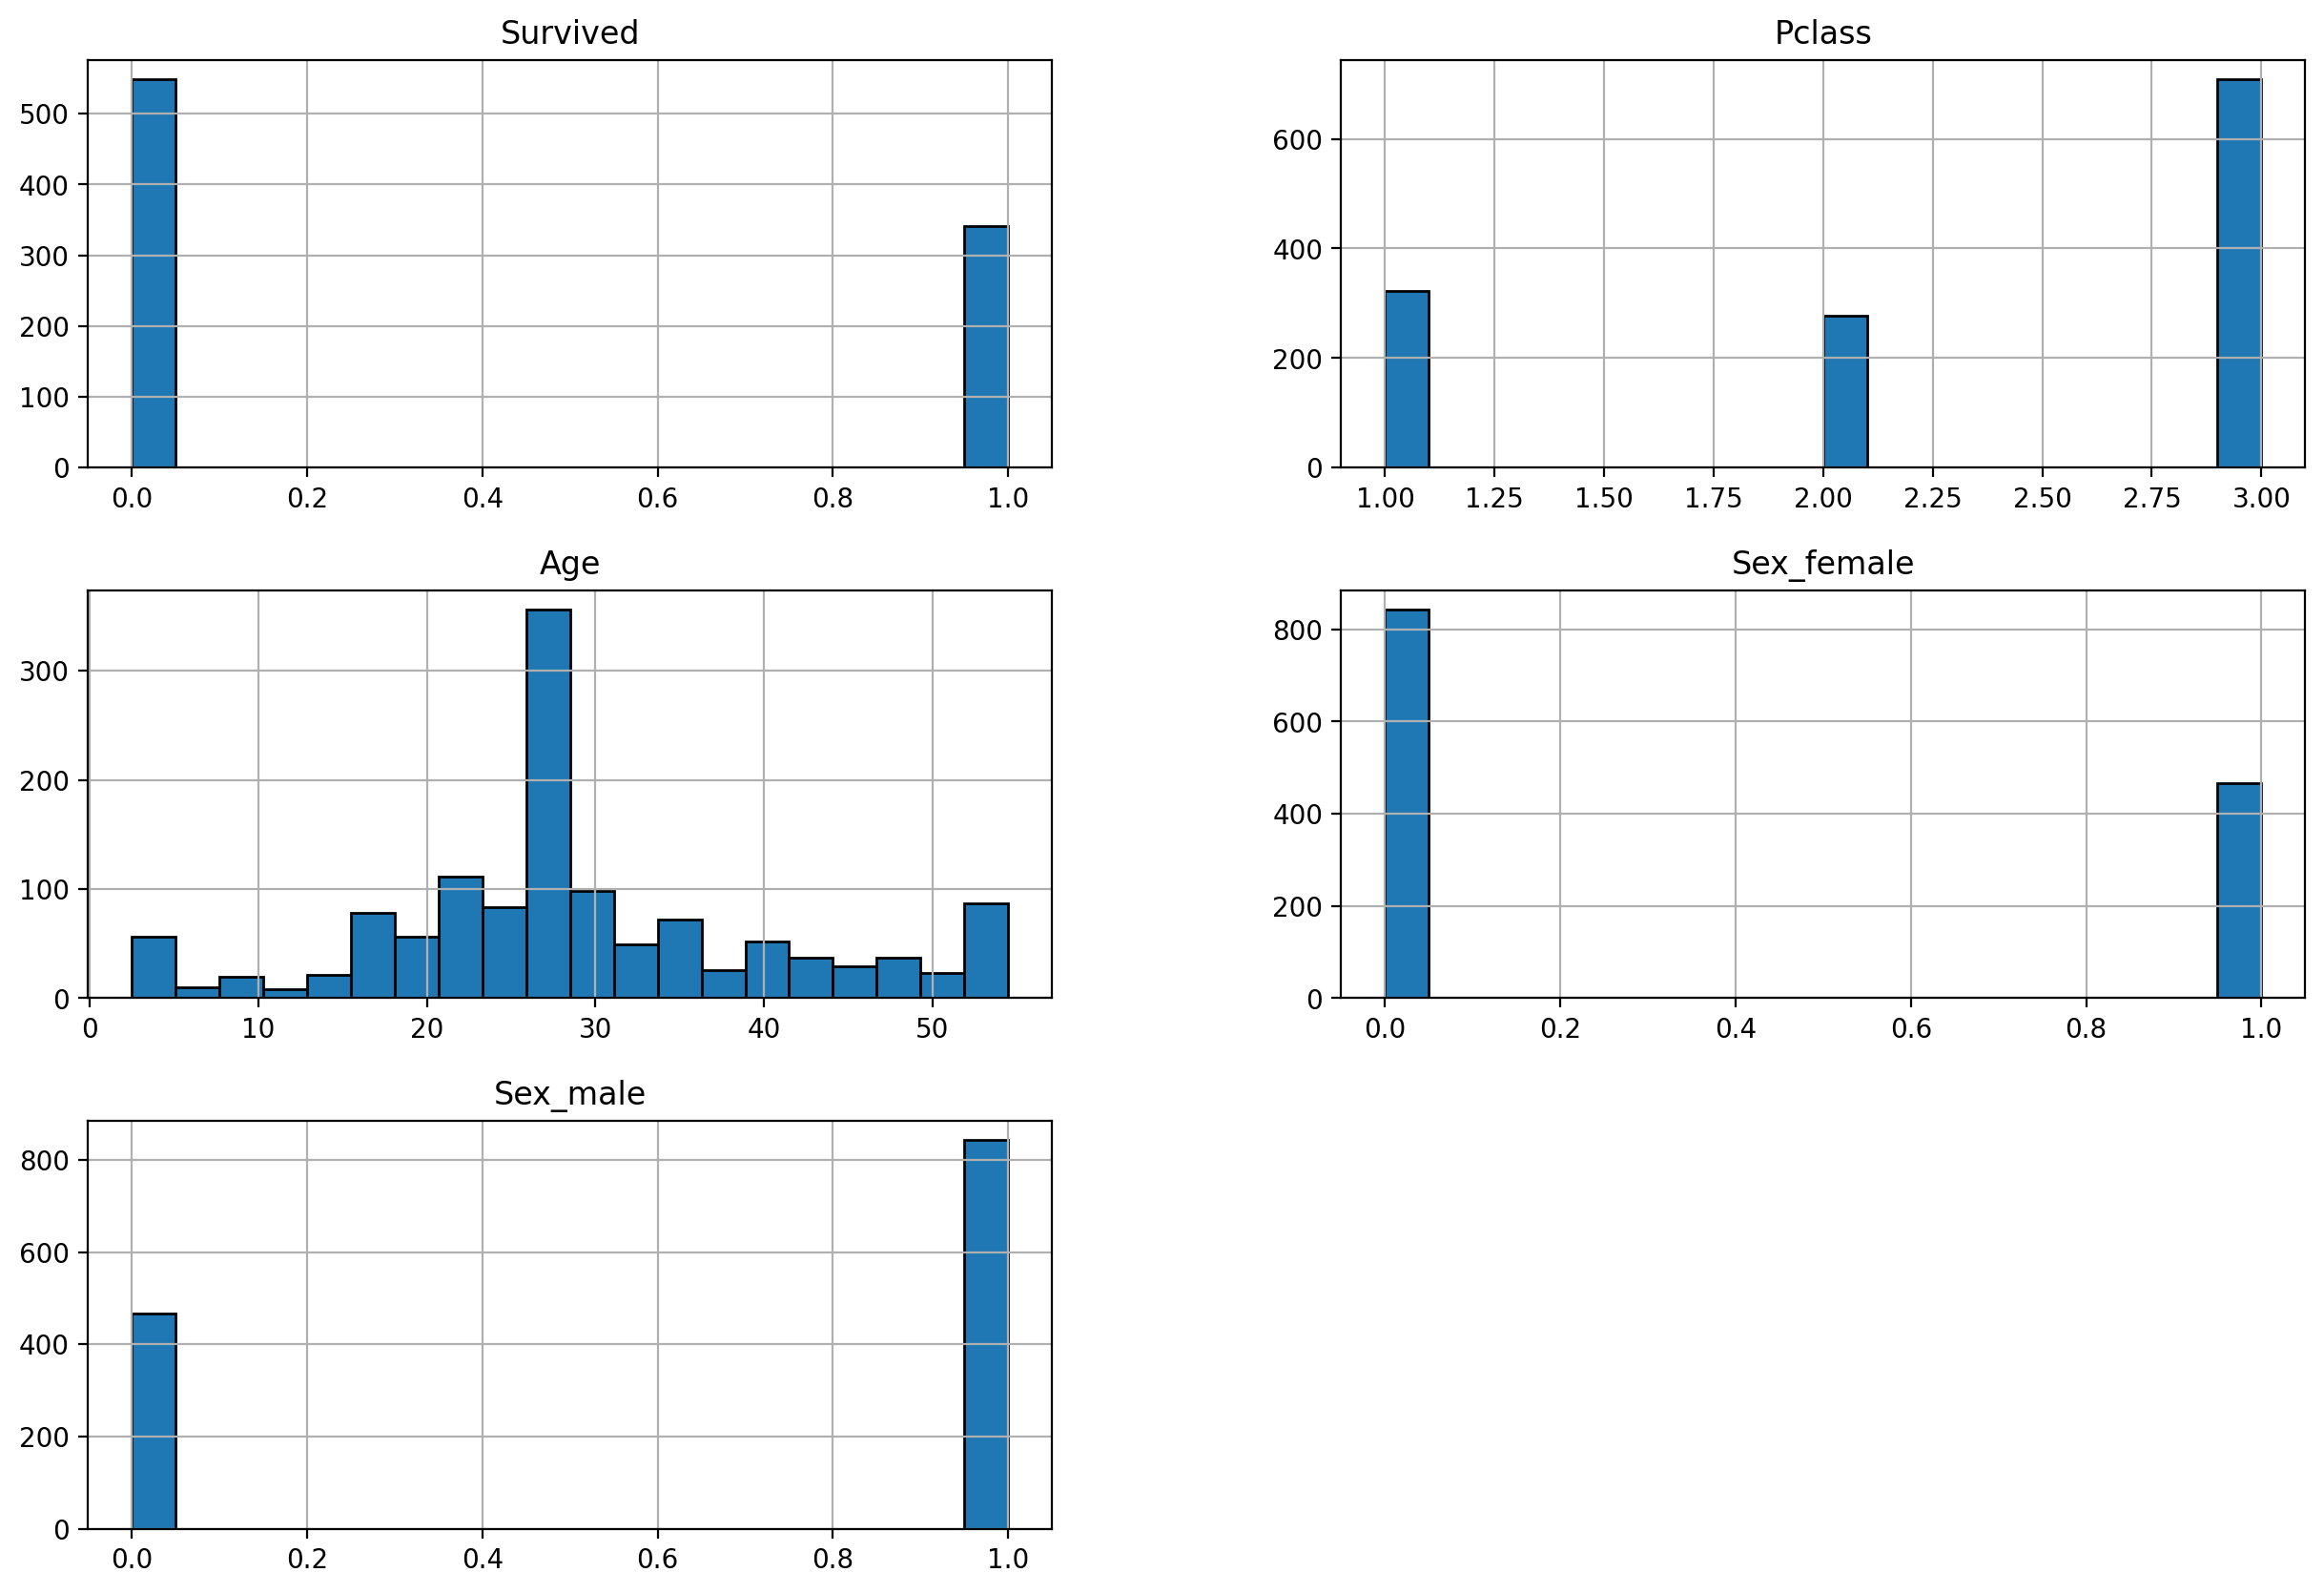

In [33]:
# Histograms for feature distribution
df.hist(bins = 20, figsize=(15,10),edgecolor = 'black')
plt.title('Histogram for all features Titanic dataset')
plt.show()

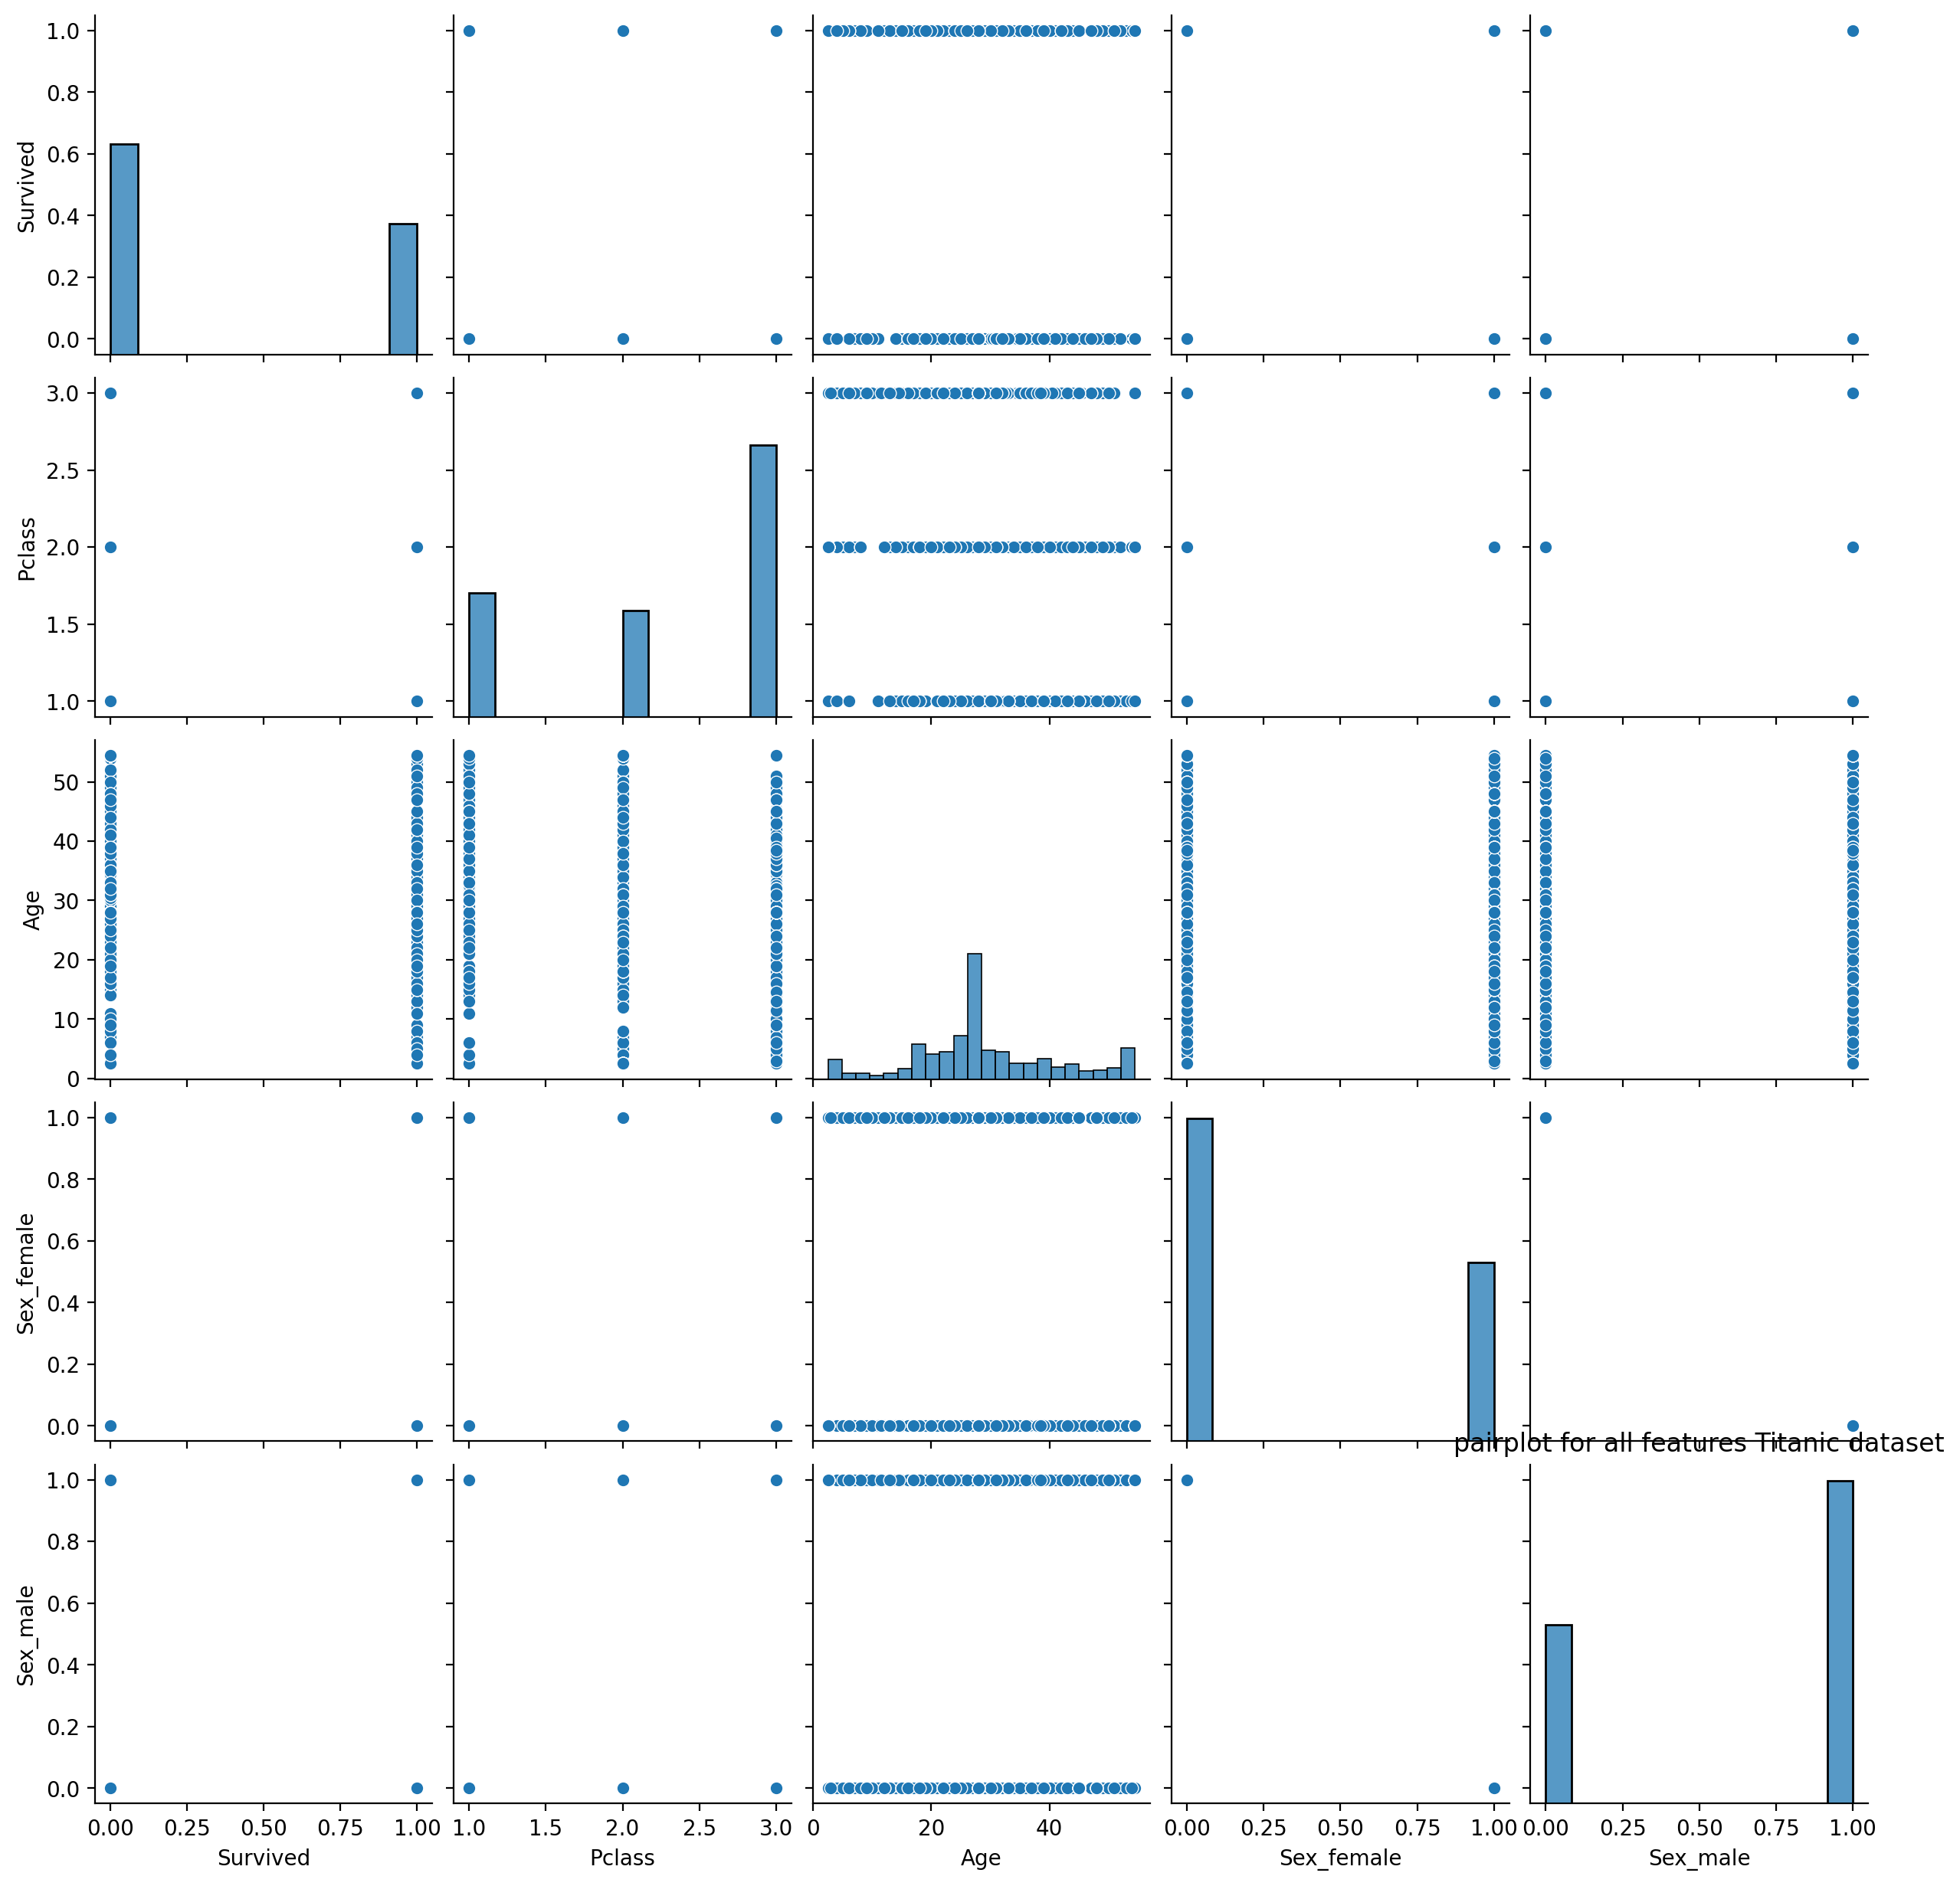

In [34]:
# Pairplot to visualize relationships between features
sns.pairplot(df)
plt.title('pairplot for all features Titanic dataset')
plt.show()

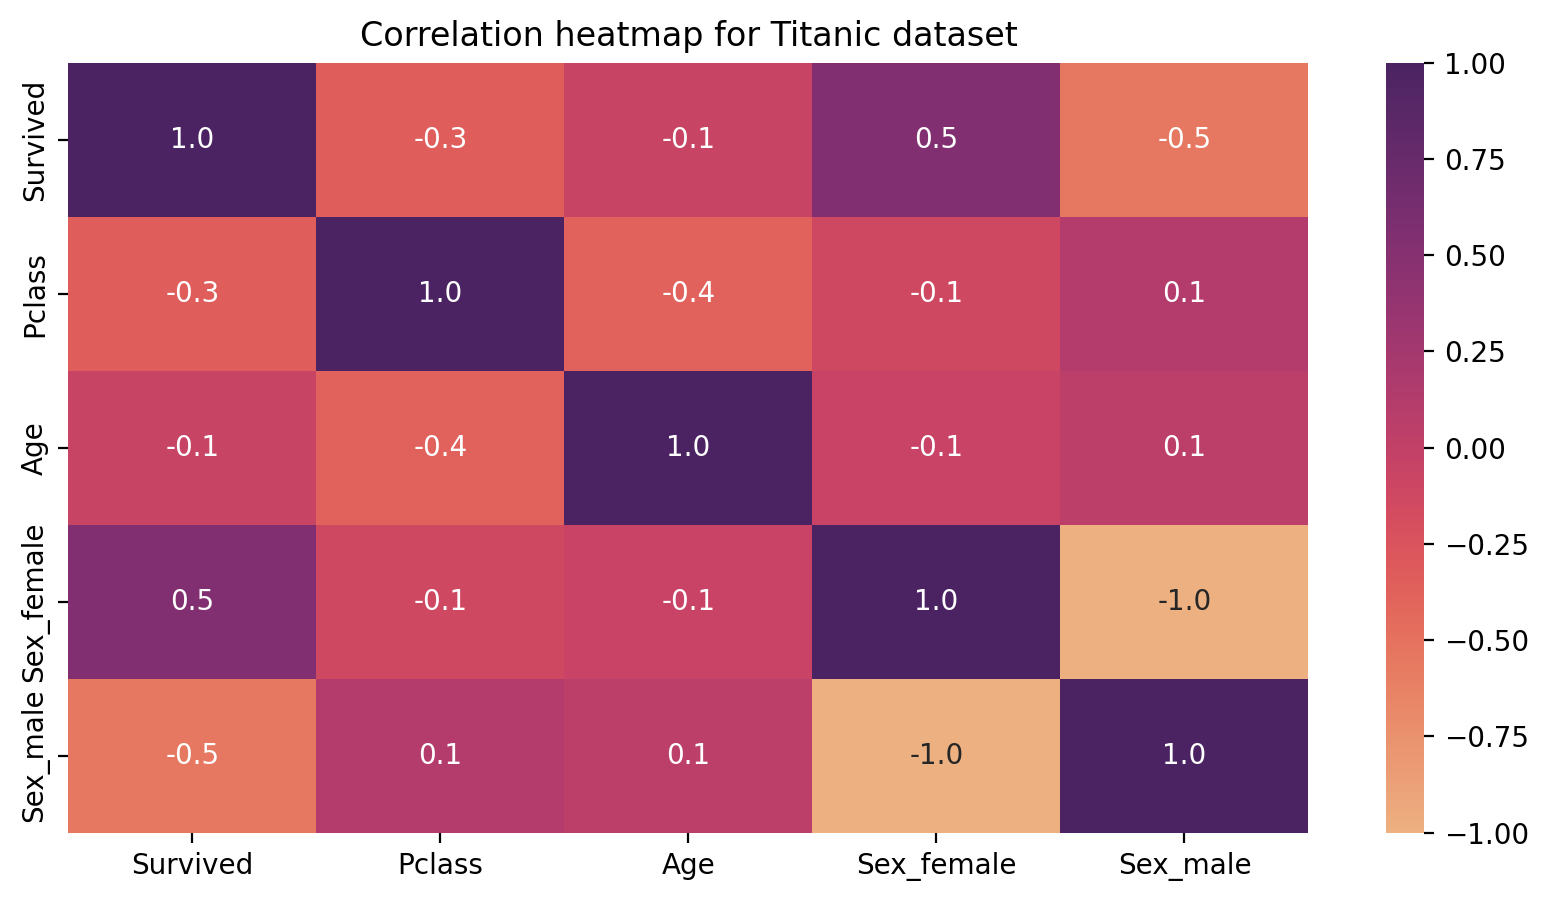

In [36]:
# Correlation matrix and heatmap
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),cbar = True, cmap = 'flare', annot = True, fmt = '.1f', center=0)
plt.title('Correlation heatmap for Titanic dataset')
plt.show()

In [39]:
# Standardize the data
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df),columns = df.columns)

In [40]:
# Split the data back into training and testing sets
train_df = df.iloc[:len(train_data)]
test_df = df.iloc[len(train_data):]

In [42]:
# Add the 'Survived' column back to the training set
train_df['Survived'] = train_data['Survived']

In [43]:
# Split the data into features (X) and target (y)
x_train = train_df.drop(columns=['Survived'])
y_train = train_df['Survived']

In [46]:
x_test = test_df

In [62]:
# Train the logistic regression model
model = LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [51]:
# Ensure the 'Survived' column is not included in the test set
x_test = test_df.drop(columns=['Survived'],errors='ignore')

In [56]:
# Predict on the test data
y_pred = model.predict(x_test)

In [61]:
# Calculate and print accuracy scores
train_accuracy = model.score(x_train,y_train)
train_accuracy

0.8002244668911336

In [60]:
# Calculate and print accuracy scores

train_accuracy = model.score(x_train, y_train)
test_accuracy = model.score(x_test, y_pred)
print(f"Training Accuracy: {train_accuracy}")
print(f"Predicted Accuracy: {test_accuracy}")


Training Accuracy: 0.8002244668911336
Predicted Accuracy: 1.0


## Interview Questions:


### 1. What is the difference between precision and recall?


**Precision:** The percentage of correctly predicted positive instances out of all instances predicted as positive. It measures the accuracy of positive predictions.

**Recall:** The percentage of correctly predicted positive instances out of all actual positive instances. It measures how well the model captures all the positive cases.

### 2. What is cross-validation, and why is it important in binary classification?


**Cross-validation:** A technique where the dataset is divided into multiple subsets (folds). The model is trained on some folds and tested on the remaining ones, rotating through all folds

**Importance in Binary Classification:**

- **Reduces Overfitting:** Ensures the model generalizes well across different subsets of data.

- **Provides Robust Evaluation:** Offers a more reliable estimate of model performance by averaging results from multiple test sets.

## Conclusion:


In this logistic regression workflow for the Titanic dataset, we performed comprehensive data preprocessing, including handling missing values, encoding categorical variables, and standardizing features. Outliers were detected and managed to ensure robust model performance. Data visualizations, such as boxplots and heatmaps, provided insights into the distribution and relationships between features.



The Logistic Regression model was trained on the processed data, achieving a training accuracy of approximately 80%. However, since the true labels for the test data are not provided, the accuracy of the model on the test set could not be computed. The overall approach demonstrated effective data preparation and model training, setting a solid foundation for further analysis and model evaluation.